Набор данных включает следующие поля:

| Поле                               	| Значение                                                                                                                                                   	|
|:------------------------------------	|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
|Churn                                 	| факт оттока в текущем месяце                                                                                                                                                                	|
| gender                              	| пол                                                                                                                                                                                          	|
| Near_Location                       	| проживание или работа в районе, где находится фитнес-центр                                                                                                                                   	|
| Partner                             	| сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи   сотрудники могут получать скидки на абонемент    в таком случае фитнес-центр хранит информацию о работодателе клиента) 	|
| Promo_friends                       	| факт первоначальной записи в рамках акции «приведи друга» (использовал   промо-код от знакомого при оплате первого абонемента)                                                               	|
| Phone                               	| наличие контактного телефона                                                                                                                                                                 	|
| Age                                 	| возраст                                                                                                                                                                                      	|
| Lifetime                            	|  время с момента первого обращения   в фитнес-центр (в месяцах)                                                                                                                              	|
| Contract_period                     	| длительность текущего действующего абонемента (месяц, 3 месяца, 6   месяцев, год)                                                                                                            	|
| Month_to_end_contract               	| срок до окончания текущего действующего абонемента (в месяцах)                                                                                                                               	|
| Group_visits                        	| факт посещения групповых занятий                                                                                                                                                             	|
| Avg_class_frequency_total           	| средняя частота посещений в неделю за все время с начала действия   абонемента                                                                                                               	|
| Avg_class_frequency_current_month   	| средняя частота посещений в неделю за предыдущий месяц                                                                                                                                       	|
| Avg_additional_charges_total        	| суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары,   косметический и массажный салон                                                                                       	|

## Импорт данных и их исследовательский анализ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# импортирую содержимое csv файла
data = pd.read_csv('C:/Users/79833/Desktop/Data/11 project/gym_churn.csv')

In [3]:
# с помощью метода set_option() задам формат отображения чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format) 

In [4]:
# посмотрю первые 5 строк датафрейма
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


In [5]:
print('Размер датафрейма:', data.shape)

Размер датафрейма: (4000, 14)


In [6]:
# изучу основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пропущенные данные отсутствуют, категориальные данные также отсутствуют

In [7]:
# переименую колонки для удобства
data.rename(columns={'Month_to_end_contract': 'end_month', 
                     'Avg_additional_charges_total': 'avg_additional', 
                     'Avg_class_frequency_total': 'avg_visits_total', 
                     'Avg_class_frequency_current_month': 'avg_visits_current'}, 
            inplace=True)

In [8]:
# приведу названия всех колонок к нижнему регистру
data.columns = data.columns.str.lower()

In [9]:
# приведу колонку с количеством месяцев до окончания абонемента к типу int
data['end_month'] = data['end_month'].astype(int)

In [10]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional,end_month,lifetime,avg_visits_total,avg_visits_current,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


In [11]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


In [12]:
# посмотрю подробную информацию про колонки, содержащие не бинарные данные
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
end_month,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


In [13]:
# сгруппирую дискретные данные и посмотрю средние значения
churn_groupby = data.groupby('churn')[['contract_period', 
                                       'age', 'avg_additional', 
                                       'end_month', 'lifetime', 
                                       'avg_visits_total', 
                                       'avg_visits_current']].mean()

churn_groupby

,contract_period,age,avg_additional,end_month,lifetime,avg_visits_total,avg_visits_current
churn,,,,,,,
0,5.75,29.98,158.45,5.28,4.71,2.02,2.03
1,1.73,26.99,115.08,1.66,0.99,1.47,1.04


In [14]:
# создам словарь с расшифровкой названий колонок
name_dict = {'churn':  'Факт оттока в текущем месяце',  
                    'gender':  'Пол',  
                    'near_location':  'Проживание или работа в районе, где находится фитнес-центр',  
                    'partner':  'Сотрудник компании-партнера клуба',  
                    'promo_friends':  'Факт первоначальной записи в рамках акции «приведи друга»',  
                    'phone':  'Наличие контактного телефона',  
                    'contract_period':  'Длительность текущего действующего абонемента', 
                    'group_visits':  'Факт  посещения групповых занятий',  
                    'age':  'Возраст',  
                    'avg_additional':  'Суммарная выручка от других услуг',  
                    'end_month':  'Срок до окончания действующего абонемента',  
                    'lifetime':  'Время с момента первого обращения в фитнес-центр',  
                    'avg_visits_total':  'Средняя частота посещений в неделю за все время',  
                    'avg_visits_current':  'Средняя частота посещений в неделю  за предыдущий месяц'}
name_dict

{'churn': 'Факт оттока в текущем месяце',
 'gender': 'Пол',
 'near_location': 'Проживание или работа в районе, где находится фитнес-центр',
 'partner': 'Сотрудник компании-партнера клуба',
 'promo_friends': 'Факт первоначальной записи в рамках акции «приведи друга»',
 'phone': 'Наличие контактного телефона',
 'contract_period': 'Длительность текущего действующего абонемента',
 'group_visits': 'Факт  посещения групповых занятий',
 'age': 'Возраст',
 'avg_additional': 'Суммарная выручка от других услуг',
 'end_month': 'Срок до окончания действующего абонемента',
 'lifetime': 'Время с момента первого обращения в фитнес-центр',
 'avg_visits_total': 'Средняя частота посещений в неделю за все время',
 'avg_visits_current': 'Средняя частота посещений в неделю  за предыдущий месяц'}

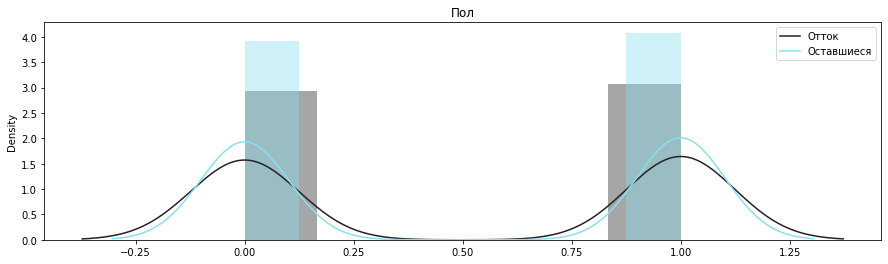

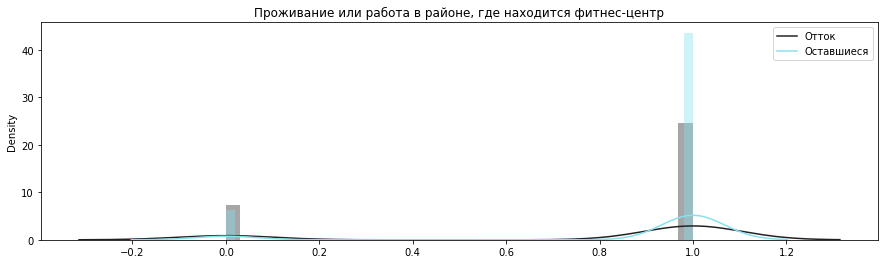

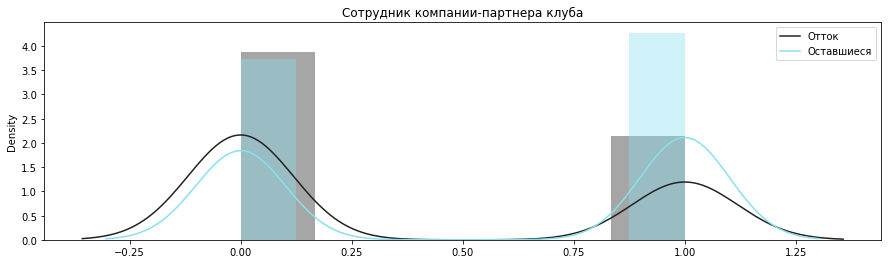

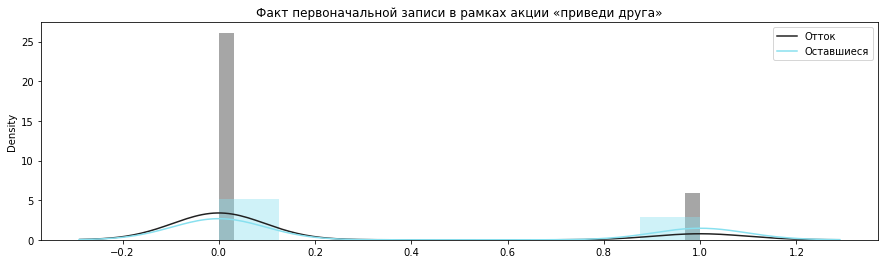

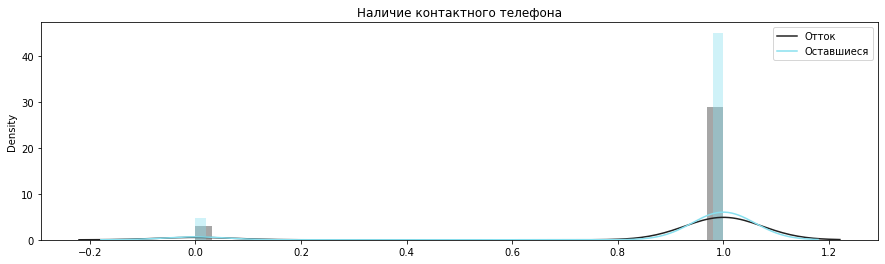

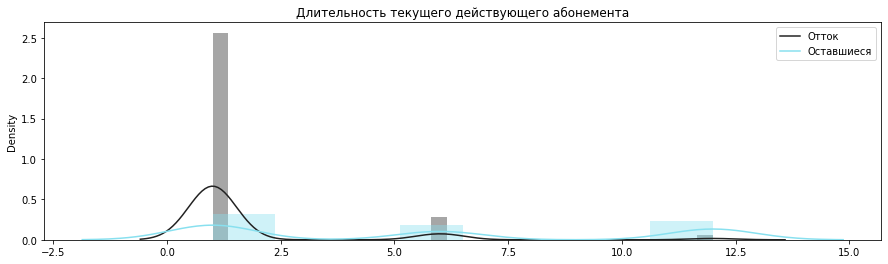

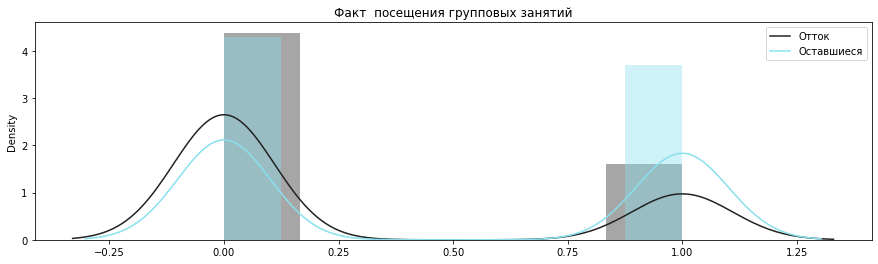

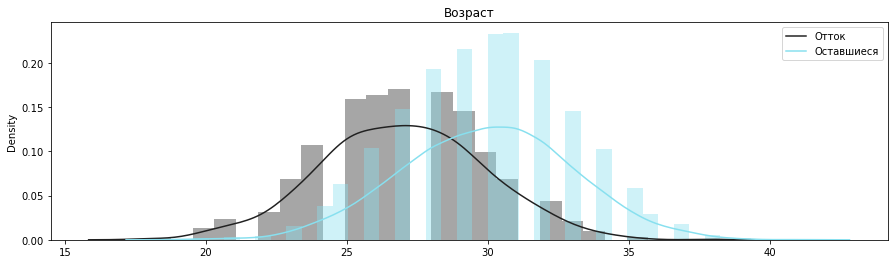

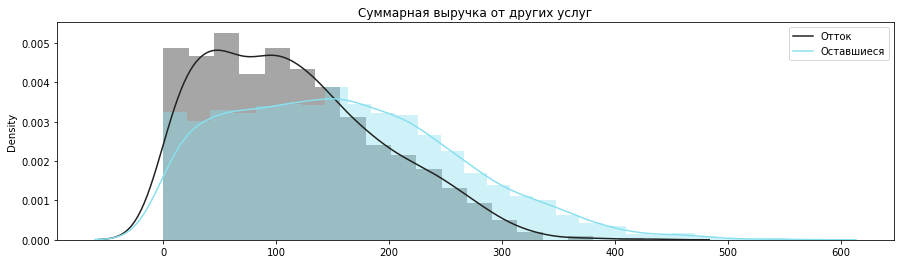

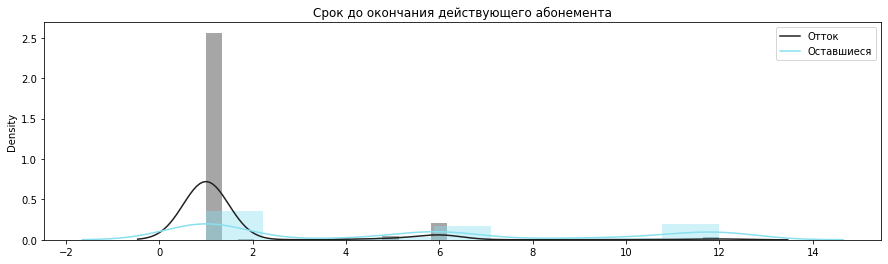

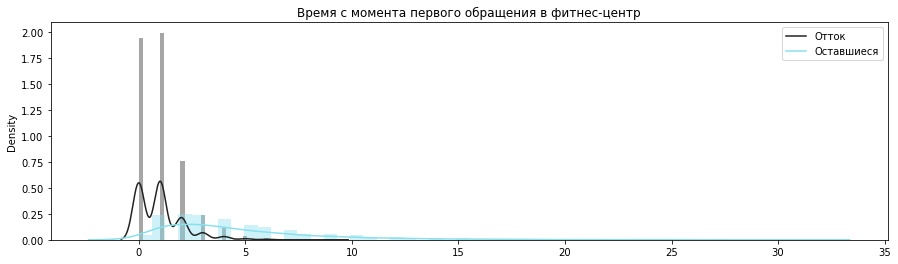

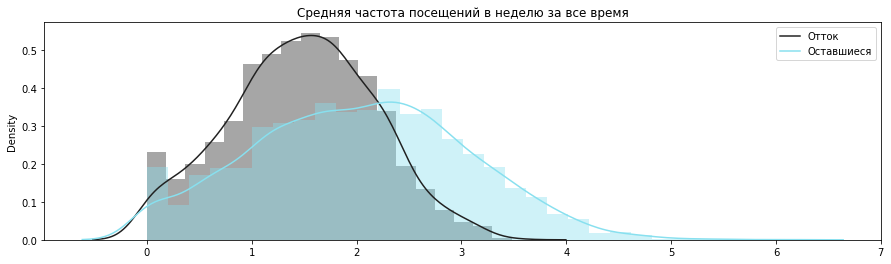

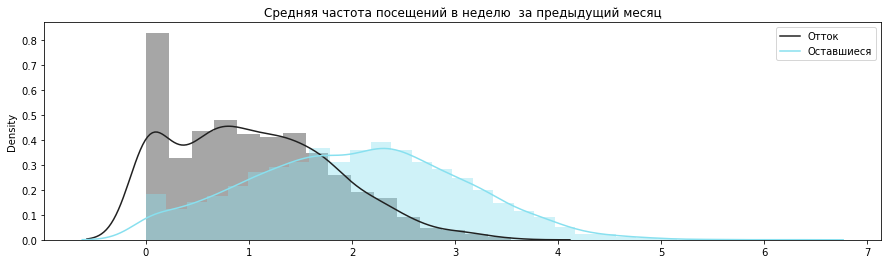

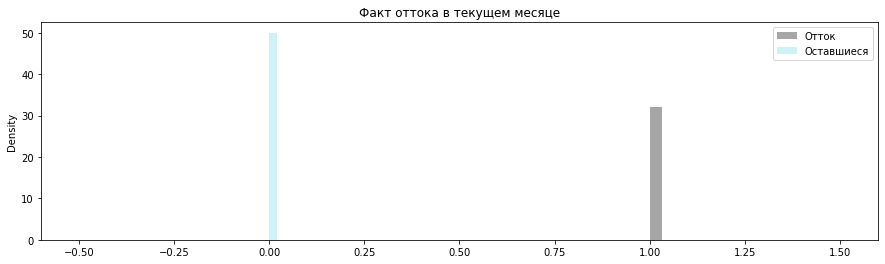

In [15]:
#построю столбчатые гистограммы распределения признаков для пользователей, которые ушли ('churn'=1) и остались ('churn'=0)

churn = data[data['churn']==1]
not_churn = data[data['churn']==0]

for col in data.columns:
    plt.figure(figsize=(15,4))
    sns.distplot(churn[col], color='#212121')
    sns.distplot(not_churn[col], color='#88E0EF')
    plt.legend(['Отток', 'Оставшиеся'])
    plt.xlabel('')
    plt.title(name_dict[col])
    plt.show();

In [16]:
# построю матрицу корреляции методом corr()
data_corr = data.corr()
data_corr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional,end_month,lifetime,avg_visits_total,avg_visits_current,churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
near_location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
avg_additional,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
end_month,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


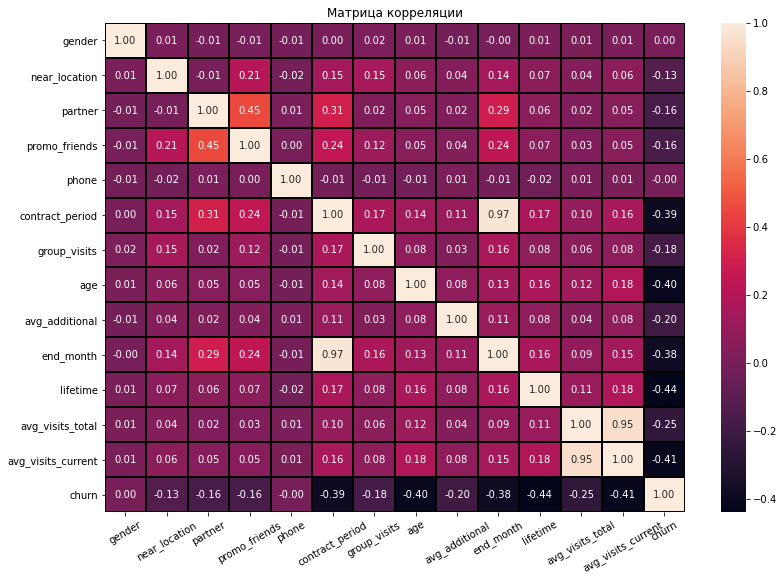

In [17]:
plt.figure(figsize=(13,9))
plt.title('Матрица корреляции')
sns.heatmap(data_corr, annot = True, fmt='.2f', linewidths=1, linecolor='black')
plt.xticks(rotation = 30)
plt.show()

**Вывод:**

Датафрейм содержит данные 4000 клиентов, пропущенные значения, дубликаты и категориальные переменные отсутствуют.

- gender: среднее по столбцу равно 0.51, можно сделать вывод, что распределение по полу примерно одинаково;
- near_location:большинство клиентов (84.5%) проживают или работают в районе, где находится фитнес-центр;
- partner: примерно половина (48.7%) клиентов являются сотрудниками компании-партнёра клуба;
- promo_friends: только около 30% клиентов пришли по по программе "Приведи друга";
- phone: известны мобильные номера примерно 90% клиентов;
- contract_period: больше половины клиентов (55.2%) приобрели месячный абонемент, 24% - на год и 20.8% - на полгода;
- group_visits: большинство (58.8%) никогда не посещали групповые занятия;
- age: средний возраст клиентов 29 лет;
- avg_additional: в среднем посетитель тратит 136 у.е. на доп.услуги центр;
- end_month: средний срок до окончания договора - 4.3 месяцев;
- lifetime: среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
- avg_visits_total: средняя частота посещений за все время - 1.87 раз в неделю, лишь небольшая доля клиентов посещает зал более 5 раз в неделю; 
- avg_visits_current: в текущем месяце число тех, кто ни разу за неделю не пришел в зал, выросло с 88 до 181;
- churn: в текущем месяце отток клиентов составил 26.5%.


У пользователей, попавших в отток, практически все средние значения признаков ниже, чем у тех, кто остался клиентом фитнес-зала. Также их объединяют критерии: 
- фитнес-центр находится далеко от дома или работы; 
- не являются сотрудниками компаний-партнеров; 
- приходят не по рекомендации;
- не посещают групповые занятия;
- приобретают краткосрочные абонементы;
- меньше тратят на дополнительные услуги;
- реже ходят в зал;
- в среднем на 3 года моложе оставшихся клиентов.

Гистограммы распределения подтверждают выводы:
- для признака near_location данные распределены неравномерно. Из этого можно предположить, что в основном пользователи выбирают фитнес-зал ближе к дому или работе. Те, для кого зал расположен не в пешей доступности, чаще уходят;
- сотрудники компаний-партнеров клуба чаще остаются, чем уходят;
- те, кто пришел по рекомнедации других клиентов, чаще попадают в отток те.

Матрица корреляции показывает наибольшую взаимосвязь с целевым признаком таких признаков как:
- lifetime; 
- средняя посещаемость в текущем месяце;
- возраст. 

Между собой также сильно коррелируют срок абонемента и число месяцев до окончания абонемента, средненедельное число посещений в целом и в текущем месяце, что является весьма логичным.

## Модель прогнозирования оттока пользователей

Для прогнозирования оттока пользователей необходимо использовать бинарную классификацию. 

Бинарная классификация — это частный случай классификации, когда классов всего два: "0" или "1". 

В данном случае целевая переменная, содержащаяся в колонке 'churn' является бинарной величиной.

Модели, обученные алгоритмами для бинарной классификации, могут не просто прогнозировать финальное значение класса для какого-то объекта или клиента, а ещё и оценивать вероятность рассматриваемого события. Популярный алгоритм для решения таких задач — **логистическая регрессия**.

- В переменной **model** будет храниться модель;
- На вход модели передам набор **значений признаков X** и **целевую переменную y**;
- Разделю выборку на обучающую и тестовую с помощью метода **train_test_split()**. Выборку разделю в соотношении 80/20, соблюдая общее правило: обучающая выборка должна быть больше отложенной, но так, чтобы проверка метрик на тесте осталась обоснованной. Добавлю параметр **random_state**, который отвечает за «случайность»;
- Для обучения модели логистической регрессии воспользуюсь классом **LogisticRegression()**, в который также передам параметр random_state;
- Чтобы запустить обучение, вызову метод **fit()**. Модели для обучения на вход передам матрицу с признаками X и вектор со значениями целевой переменной у;
- Чтобы построить прогнозы для набора данных вызову метод **predict()**

In [18]:
# разделю исходные данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis = 1) #объекты-признаки
y = data['churn'] #целевая переменная

# разделю модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [19]:
# задам алгоритм для модели
model = LogisticRegression(random_state=0)

# обучу модель
model.fit(X_train, y_train)

# выполню прогнозы
predictions = model.predict(X_test)

Попробую также решить поставленную задачу с помощью ансамблей. Они мощные и позволяют отражать сложные зависимости между данными.

Одним из основных типов ансамблевых моделей является **случайный лес**. В качестве модели будет использовано дерево принятия решений. Выбор деревьев не случаен. В отличие от, например, линейных моделей, у деревьев для каждого отдельного слабого классификатора можно менять не только подвыборки наблюдений и признаков, но и другие параметры. Например, ограничить глубину дерева или минимальное число объектов в каждом узле. Поэтому деревьями получают гораздо больше моделей для решения одной и той же задачи.

Алгоритм случайного леса генерирует множество различных независимых друг от друга деревьев слегка разными способами (берёт разные подвыборки, разные признаки), а на основании их ответов формирует итоговое решение. Алгоритм случайного леса усредняет ответы всех деревьев (в задаче регрессии) или выбирает голосованием (в классификации) тот ответ, который большинство деревьев в лесу считает правильным.

- Для обучения модели воспользуюсь классом RandomForestClassifier(), в который также передам параметр random_state;
- При объявлении модели задам n_estimators = 100 (число деревьев, на основании которых будет строиться лес);
- Другие параметры дерева, такие как, глубина дерева (max_depth), размер подвыборки признаков (max_features), минимальное количество объектов в узле (min_samples_leaf) оставлены по умолчанию.



In [20]:
# задам алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(random_state=0, n_estimators = 100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

Так как в модели итоговое спрогнозированное значение принимает значения 0 или 1, для каждого объекта прогноз относится к одной из четырех групп:
1) Прогноз модели = 1, реальное значение = 1. Такие прогнозы называют True Positive (TP), «истинно положительные».

2) Прогноз модели = 1, реальное значение = 0. Такие прогнозы называют False Positive (FP), «ложно положительные».

3) Прогноз модели = 0, реальное значение = 1. Такие прогнозы называют False Negative (FN), «ложно отрицательные».

4) Прогноз модели = 0, реальное значение = 0. Такие прогнозы называют True Negative (TN), «истинно отрицательные».

У хорошей модели бóльшая часть прогнозов должна попадать в группы TP и TN.

- **Доля правильных ответов** - метрика **Accuracy** отображает долю верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше;
- Чтобы оценить модель без привязки к соотношению классов, рассчитывают метрики:
    - **Precision** - показывает, какая доля прогнозов относительно "1" класса верна. Другими словами, отображает долю правильных ответов только среди целевого класса;
    - **Recall** показывает, сколько реальных объектов "1" класса можно было бы обнаружить с помощью модели, нацелена на минимизацию противоположных рисков

In [21]:
# функция, которая будет выводить метрики
def metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
metrics(y_test, predictions, title='Метрики для модели линейной регрессии:')

metrics(y_test, rf_predictions, title='Метрики для модели случайного леса:')

Метрики для модели линейной регрессии:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.80
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


**Вывод:** модель линейной регрессии показывает себя лучше, т.к. все исследуемые метрики немного, но выше, чем у модели случайного леса



## Кластеризация пользователей

Так как клиентская база "Культуриста-датасаентиста" не однородна, можно попробовать разбить ее на сегменты с помощью кластеризации. Она поможет выделить сегменты пользователей и, например, предложить каждому сегменту подходящий вариант продукта. 

- Необходимо привести признаки к единому масштабу с помощью **стандартизации**, которая приведёт значения признаков к виду стандартного нормального распределения: значения будут центрированы относительно 0, а средний разброс данных составит 1;
- В  **X_sc** с помощью метода **fit_transform()** попадет преобразованная таблица объект-признак для обучающего и валидационного набора, которая будет применяться для обучения и прогнозирования;
- После этого выполняется стандартизация и передается получившаяся стандартизированная таблица в качестве параметра функции **linkage()**. Чтобы диаграмма получилась показательной, лучше передать параметру method значение 'ward'

In [22]:
#сначала удалю из датасета столбец с целевой переменной
data_cluster = data.drop('churn', axis = 1)

#стандартизирую данные
sc = StandardScaler()
X_sc = sc.fit_transform(data_cluster)

#построю матрицу расстояний на стандартизированной матрице признаков
linked = linkage(X_sc, method = 'ward')

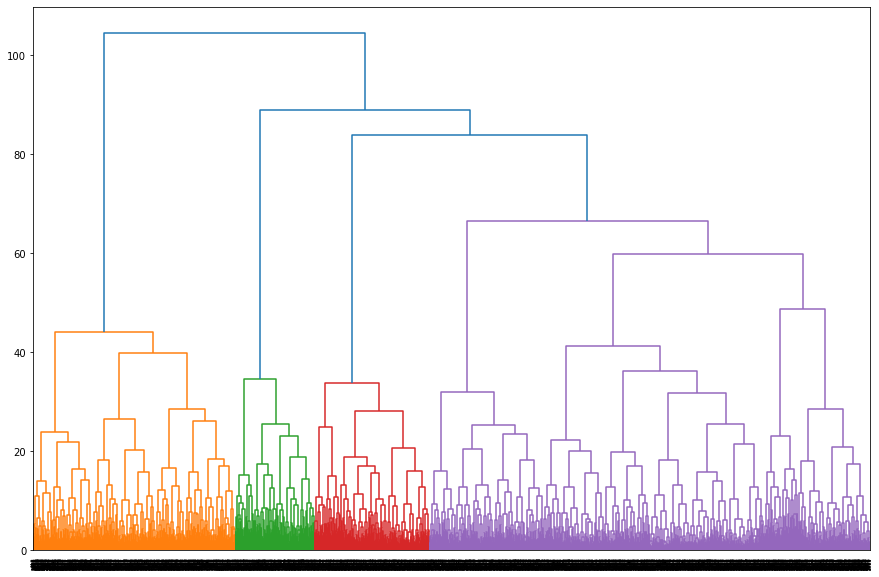

In [23]:
# в переменной linked сохранена таблица «связок» между объектами. Визуализирую ее как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Предложенное оптимальное число кластеров - 4.

Сложность агломеративной кластеризации заключается не в устройстве самого алгоритма, а в вычислениях, которые совершаются для построения дендрограммы. Расчёты попарных расстояний могут занять очень много времени. Потому при решении задачи кластеризации полезно строить дендрограмму на случайной подвыборке, а после оценки оптимального числа кластеров запустить более быстрый алгоритм K-Means.

**K-means** является одним из популярных алгоритмов кластеризации. Алгоритм основан на предположении, что число кластеров заранее известно. 

Принцип работы пошагового алгоритма K-means:

1) Есть K кластеров. Алгоритм пошагово подбирает их центры и относит объекты к тому кластеру, чей центр ближе.

2) Центры корректируются (меняют своё положение) до тех пор, пока это позволяет минимизировать среднее расстояние от объектов каждого кластера до его центра.

3) Когда расстояние от объектов до центра перестаёт снижаться или сокращается несущественно, алгоритм останавливается и фиксирует разбиение, считая его оптимальным.

In [24]:
# применю алгоритм к данным и сформирую вектор кластеров, стандартизация данных уже выполнена ранее в переменной X_sc

km = KMeans(n_clusters = 5, random_state = 0) # задам число кластеров, равное 5
labels = km.fit_predict(X_sc) # в переменной labels сохраняются индексы предложенных алгоритмом групп

In [25]:
#сохраню метки кластера в поле датафрейма
data_cluster['cluster'] = labels

In [26]:
# выведу статистику по средним значениям признаков по кластерам
data_cluster.groupby(['cluster']).mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional,160.76,143.96,135.46,131.62,161.66
end_month,9.95,4.48,2.20,1.86,2.46


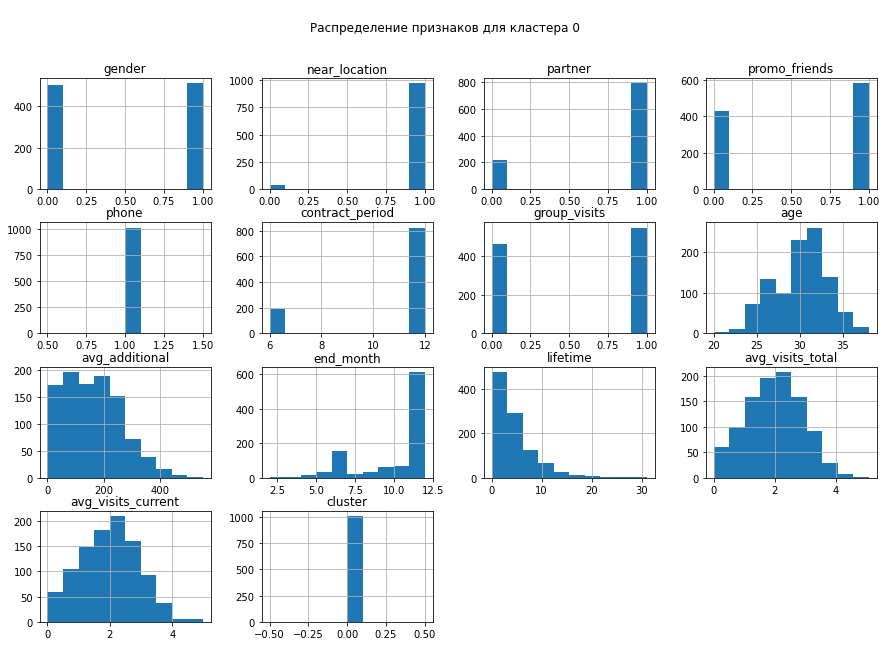

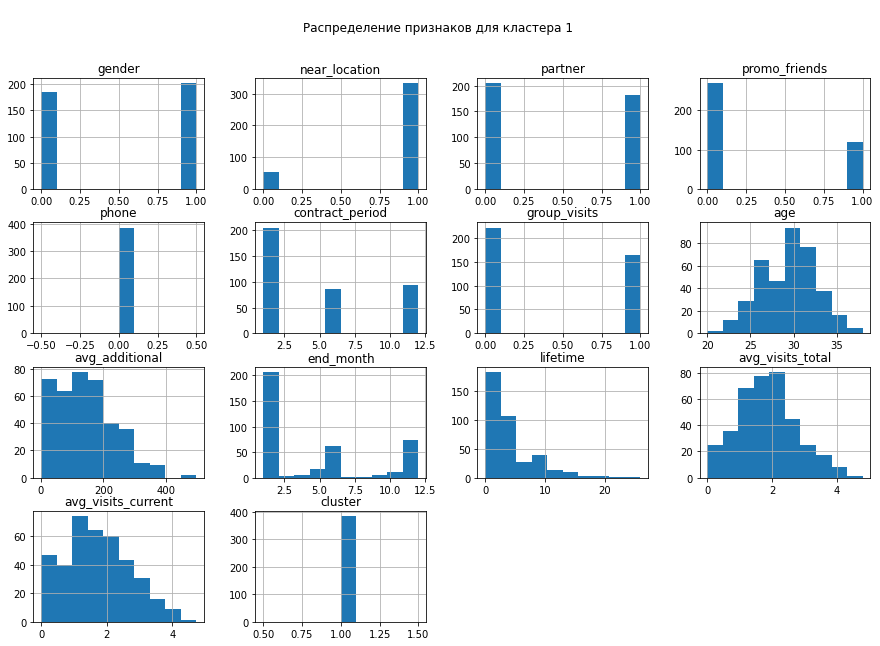

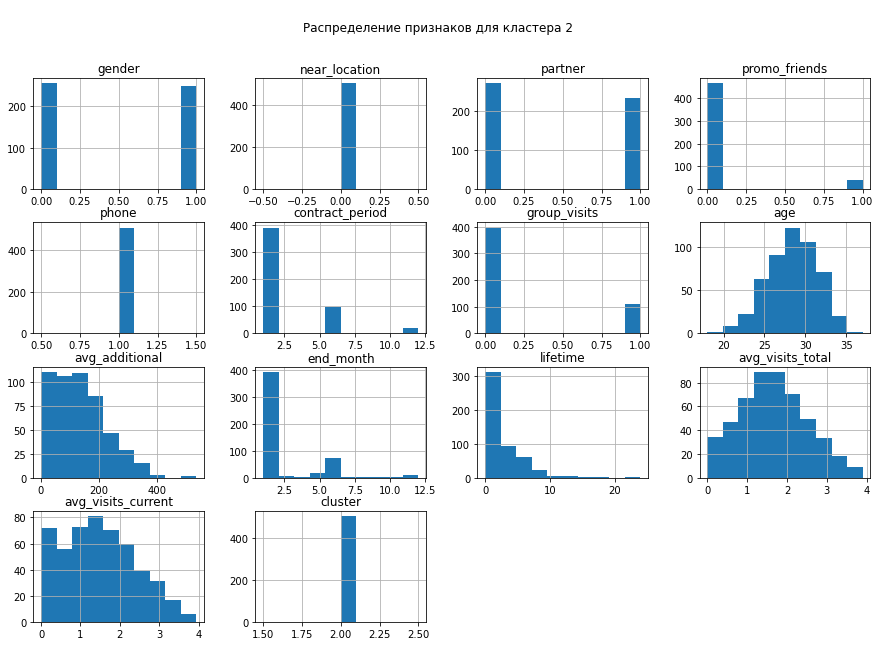

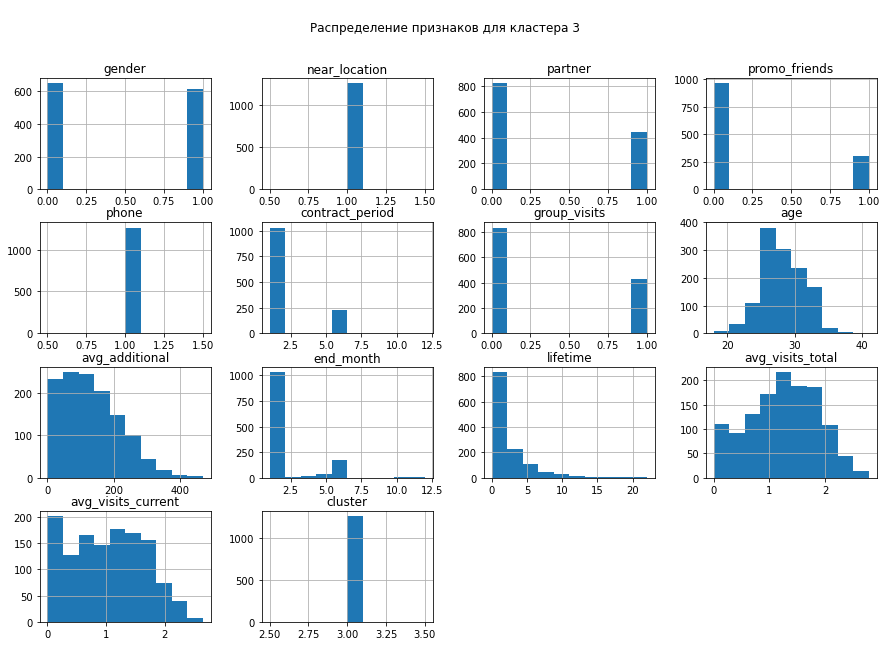

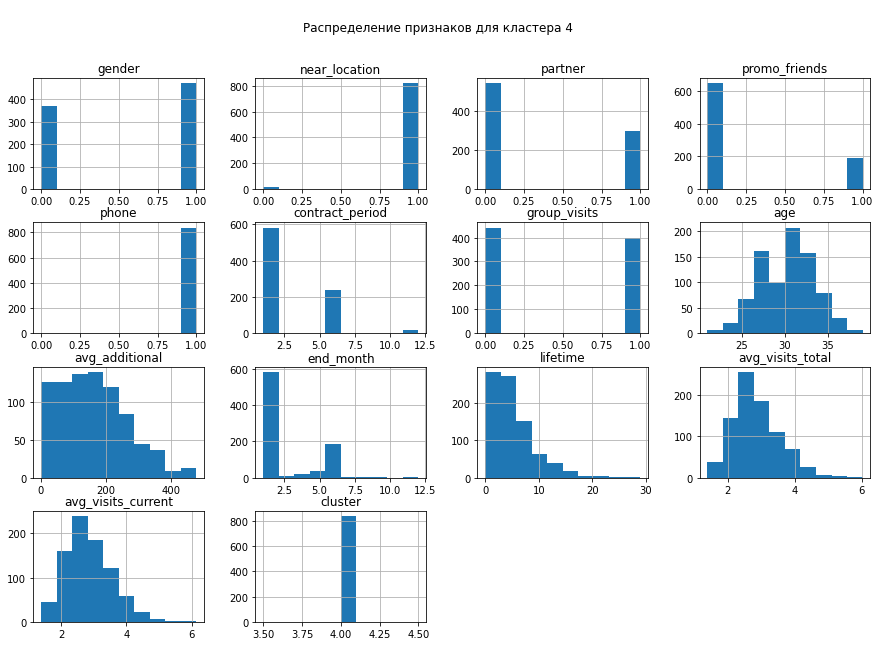

In [27]:
for value in [0, 1, 2, 3, 4]:
    data_cluster[data_cluster['cluster']==value].hist(figsize=(15,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value))
    plt.show();

In [28]:
#добавим значения кластеров в исходный датасет

data['cluster'] = labels

In [29]:
#для каждого кластера рассчитаем общее число клиентов и число клиентов, попавших в отток
#рассчитаем коэффициент оттока

clusters = data.groupby('cluster', as_index=False).agg({'churn':['count', 'sum']})
clusters.columns = [' '.join(col).strip() for col in clusters.columns.values]
clusters.rename(columns={'churn count':'total', 'churn sum':'churn'}, inplace=True)
clusters['churn_rate'] = round(clusters['churn'] / clusters['total'], 2)
clusters.sort_values(by='churn_rate', ascending=False)

,cluster,total,churn,churn_rate
3,3,1262,649,0.51
2,2,505,224,0.44
1,1,385,103,0.27
4,4,838,57,0.07
0,0,1010,28,0.03


**Вывод:**

- Клиенты 2 кластера не проживают и не работают близко к фитнес-центру;
- В каждом кластере минимум треть клиентов является сотрудников компании-партнера клуба;
- Наименьшая доля клиентов, пришедших по промо-акции "Приведи друга" - во 2 кластере;
- Клиенты фитнес-центра из первого кластера не указали контактный номер телефона;
- Наибольшая средняя длительность текущего абонемента и сумма расходов на дополнительные услуги клуба у пользователей из 1 кластера;
- От 22% до 54% клиентах во всех кластерах посещают групповые занятия, меньше всего таких пользователей во 2 кластере;
- Время с момента первого обращения в фитнес-центр составляет в среднем от 2,5 до почти 5 месяцев;
- Средняя частота посещений в неделю с начала действия абонемента и за все время практически одинаковая во всех кластерах, кроме 2 и 3: в них она снизилась с 1.66 до 1.48 и с 1.25 до 1.01, соответственно.

Наиболее склонны к оттоку клиенты 3 и 2 кластерв (51% и 44%, соответственно), клиенты 0 и 4 кластеров являются самыми лояльными. 

Следует отметить, что в 0 и 3 кластерах наибольшее количество клиентов.

**Общий вывод**:

в ходе данного исследования была изучена информация о 4000 клиентах фитнес-центра, построены модели прогнозирования оттока пользователей и реализована модель кластеризации.

В результате исследования были выявлены следующие закономерности для пользователей, переставшими быть клиентами фитнес-центра в текущем месяце:

- они живут или работают далеко от фитнес-центра, т.е. для клиентов важна пешая доступность спорт-зала, они не хотят тратить лишнее время на дорогу;
- они не являются сотрудниками компаний-партнеров, другими словами, для них нет скидки на абонемент от работодателя;
- приходят не по рекомендации друзей, ставших клиентами фитнес-центра;
- редко посещают групповые занятия;
- чаще всего приобретают краткосрочные абонементы, возможно хотят понять, готовы ли они посещат данный клуб;
- меньше тратят на другие услуги фитнес-центра, такие как кафе, спорт-товары, косметический или массажный салон;
- реже ходят в зал;
- возраст в среднем на 3 года меньше, чем у оставшихся пользователей.

При прогнозировании оттока клиентов в следующем месяце лучше всего себя показала модель логистической регрессии - значения метрик accuracy , precision и recall оказались выше рассчитанных по модели случайного леса. Можно сделать вывод, что модель надежна, т.е. значения метрик достаточно высоки.

Также была выполнена кластеризация, в результате которой было выявлено, что наиболее склонны к оттоку клиенты 3 и 2 кластерв (51% и 44%, соответственно), клиенты 0 и 4 кластеров являются самыми лояльными.

**Рекомендации:**

Средний срок абонементов для клиентов 3 кластера составляет 1 месяц, т.е. вероятно таких клиентов и не стоит рассматривать как потенциально постоянных. Такой срок абонемента может говорить о том, что человек хочет в целом попробовать начать заниматься спортом, ходят в зал редко, вероятно, что их отток связан с недостатком мотивации. Для клиентов из этого кластера можно предложить скидку на дополнительные услуги фитнес-цетра, чтобы расширить их представление об услугах, оказываемых в клубе. Также эффективно может быть предложение о продлении абонемента по более выгодным условиям, программа "постоянный клиент", когда при покупке абонементов без перерыва, клиенту предлагается хорошая скидка

Более лояльные клиенты проживают или работают ближе к фитнес-центру, поэтому рекламная кампания, направленная на жителей близлежащих домов или заключение выгодных договоров с работодателями, находящимися в пешой доступности, может привести множество новых клиентов, по которым ожидается минимальный отток.

Стоит обратить внимание на информирование действующих, а также потенциальных клиентов фитнес-центра о наличии групповых занятий, акцентировать внимание на том, что для новичков это будет эффективнее, т.к. занятия будут проходить под надзором тренера. В крайнем случае можно пересмотреть формат, время или обратить внимание на предподавателей групповых занятий, т.к. их посещаемость недостаточно велика.